In [1]:
from info_task_exp import *
from funcs_data_preprocessing import import_data, add_game_index
from funcs_model import *
from funcs_model_analysis import get_model_filename
from funcs_model_simulation import *
from funcs_learning_curve import *

### Simulation

In [2]:
def get_simulation(modelName, numGamePerType=30, nTrialsRealData=0):
    hyper_parameters, epoch = winning_model[modelName].values()
    dataInfo = get_dataInfo(modelName)
    model = initialize_model(modelName, dataInfo, hyper_parameters)
    model.load_state_dict(torch.load('models/model_' + get_model_filename(modelName, hyper_parameters, epoch), map_location=get_device()))
    model.eval()
    
    simu_filename = 'model_simulation/' + modelName + ('_nTrialsRealData' + str(nTrialsRealData) if nTrialsRealData > 0 else '') + '.csv'
    
    if os.path.exists(simu_filename):
        simudata = pd.read_csv(simu_filename)
    else:
        x_other = None
        data_real = None
        if nTrialsRealData > 0:
            data_real = import_data()
            data_real = add_game_index(data_real)
        simudata = simulation(dataInfo, model, numGamePerType, x_other, nTrialsRealData, data_real)
        simudata.to_csv(simu_filename, index=False)

#### run simulation

In [3]:
for modelName in ['LSTM', 'LSTM_embed']:
    get_simulation(modelName)
    get_simulation(modelName, nTrialsRealData=2)

GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used
GPU not available, CPU used


### Learning curves (RNN w/ embedding model)

/Users/mingyusong/Dropbox (Princeton)/research/Projects/RuleLearning/RNN(public)/funcs_learning_curve.py:50: RuntimeWarning: Mean of empty slice
  ax.plot(trial_index, np.squeeze(np.nanmean(np.stack(chance_curves, axis=1),axis=1)), color='k', lw=linewidth, ls='--')
/Users/mingyusong/Dropbox (Princeton)/research/Projects/RuleLearning/RNN(public)/funcs_learning_curve.py:50: RuntimeWarning: Mean of empty slice
  ax.plot(trial_index, np.squeeze(np.nanmean(np.stack(chance_curves, axis=1),axis=1)), color='k', lw=linewidth, ls='--')
/Users/mingyusong/Dropbox (Princeton)/research/Projects/RuleLearning/RNN(public)/funcs_learning_curve.py:50: RuntimeWarning: Mean of empty slice
  ax.plot(trial_index, np.squeeze(np.nanmean(np.stack(chance_curves, axis=1),axis=1)), color='k', lw=linewidth, ls='--')
/Users/mingyusong/Dropbox (Princeton)/research/Projects/RuleLearning/RNN(public)/funcs_learning_curve.py:50: RuntimeWarning: Mean of empty slice
  ax.plot(trial_index, np.squeeze(np.nanmean(np.stack(cha

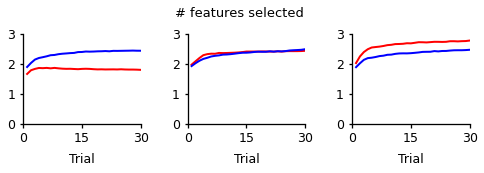

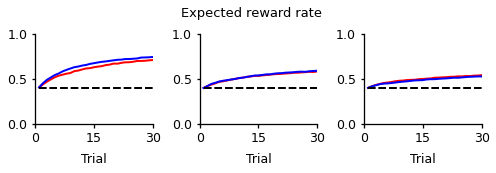

In [4]:
modelName = 'LSTM_embed'
simudata = pd.read_csv('model_simulation/' + modelName + '.csv')
for varName in ['NumSelected', 'ExpectedReward']:
    plot_learningCurve(data=simudata, varName=varName)